# Análisis de Fourier
* Prof. Esteban Pérez Hidalgo
* Física Computacional I I-2024

## Transformada Discreta de Fourier (Landau $\S$ 10.4.1)

En la práctica, una señal y(t) se mide un número finito N de veces y son esas mediciones las que se usan para aproximar la transformada de Fourier. La transformada discreta de Fourier resultante se usa como una técnica para interpolar, comprimir y extrapolar datos.

Se usan las siguientes definiciones:
$$y_k = y(t_k),~~~~\text{donde}~k = 1, 2, ... N$$
$$t_k = kh,~~~~\text{donde}~h = \Delta t$$
$$T = Nh,~~~~s = \dfrac{N}{t}=\dfrac{1}{h}$$


Donde _T_ es el periodo y _s_ la tasa de muestreo.

El periodo de la función determina la frecuencia principal, las frecuencias $\omega_n$ se determinan con el número de muestras tomadas dutante el periodo.

$$\omega_1 = \dfrac{2\pi}{T},~~~~\omega_n = n\omega_1 = n\dfrac{2\pi}{Nh}$$

Se procede con la discretización de la expresión de la transformada:
$$Y(\omega_n) = \int_{-\infty}^{+\infty}\mathrm{d}t~\dfrac{\mathrm{e}^{-i\omega_n t}}{\sqrt{2\pi}}~y(t)$$
$$\simeq \int_0^T\mathrm{d}t~\dfrac{\mathrm{e}^{-i\omega_n t}}{\sqrt{2\pi}}~y(t)$$ 
$$\simeq \sum_{k=1}^{+\infty}h~y(t_k)~\dfrac{\mathrm{e}^{-i\omega_n t_k}}{\sqrt{2\pi}}$$ 
$$\Rightarrow Y(\omega_n) = h\sum_{k=1}^{+\infty}~y_k~\dfrac{\mathrm{e}^{\frac{-2\pi i kn}{N}}}{\sqrt{2\pi}}$$

De la misma manera, se puede discretizar la transformada inversa:
$$y(t) = \int_{-\infty}^{+\infty}\mathrm{d}\omega~\dfrac{\mathrm{e}^{i\omega_n t}}{\sqrt{2\pi}}~Y(\omega)$$
$$\simeq \dfrac{2\pi}{Nh}\sum_{n=1}^{+\infty}~Y(\omega_n)~\dfrac{\mathrm{e}^{i\omega_n t}}{\sqrt{2\pi}}$$

* Una señal _real_ puede producir una transformada de Fourier _compleja_.

## Transformada Rápida de Fourier (FFT) (Landau $\S$ 10.8)

La evaluación de los términos de la transformada de Fourier es un procedimiento computacionalmente caro.

Los cálculos de transformada de Fourier tienen una complejidad computacional de $O(N^2)$. Es decir, crecen como $N^2$ donde $N$ es el número de puntos.
El algoritmo de la transformada rápida logra hacer que el número de operaciones crezca como $O(NlogN)$ 

### Algoritmo

Consulte la sección 10.8 del Landau

### Ejemplo: Señal tipo sierra

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, fft

# Parámetros
periodoL = 8 # periodo de la función f(x)
freq = 4 # frecuencia angular o número de ondas en un periodo
dutycycle = 0.5
width_range = 1
nMuestras = 1000

# Número de muestras
N = 600
# Espaciamiento entre muestras
T = 1.0 / 800.0

#
arreglo_X = np.linspace(0, periodoL, nMuestras, endpoint=False)
arreglo_y = signal.sawtooth(2.0*np.pi*arreglo_X*freq/periodoL ,width=width_range)
# y = 2*np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(150.0 * 2.0*np.pi*x)#+np.random.random(N)

yf = fft.fft(arreglo_y)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

print(f'Coeficientes de Fourier para la señal: \n{yf}')

Coeficientes de Fourier para la señal: 
[-4.00000000e+00-0.00000000e+00j -3.46757518e-15+2.73223802e-14j
  1.29750299e-14+1.65148765e-14j -5.45280250e-15+1.27624526e-14j
 -4.00000000e+00+3.18293131e+02j -6.88386517e-15+1.02181462e-14j
  3.72656739e-15+1.00964341e-14j -3.71496753e-14+4.42146065e-14j
 -4.00000000e+00+1.59121431e+02j  9.92206801e-15-3.74699461e-14j
 -7.13764434e-15-2.44069542e-15j  1.14753316e-14-2.03308350e-14j
 -4.00000000e+00+1.06053025e+02j  1.33470303e-14-1.43145674e-14j
 -1.18526403e-14+1.78774922e-14j  2.22349383e-14-3.22018085e-14j
 -4.00000000e+00+7.95104396e+01j  2.27852449e-15+2.75625502e-14j
  7.41080057e-15-1.21271388e-14j  3.10496438e-15+1.90414494e-16j
 -4.00000000e+00+6.35781794e+01j -1.49718502e-15+9.53382418e-15j
  6.31088575e-15-1.28653976e-14j  1.26893118e-14+1.27438104e-14j
 -4.00000000e+00+5.29510786e+01j -1.74162141e-15-2.24778342e-16j
 -2.47177904e-16+7.49704199e-15j -7.38241184e-15+7.44067909e-16j
 -4.00000000e+00+4.53554942e+01j  2.00505885e-15-3

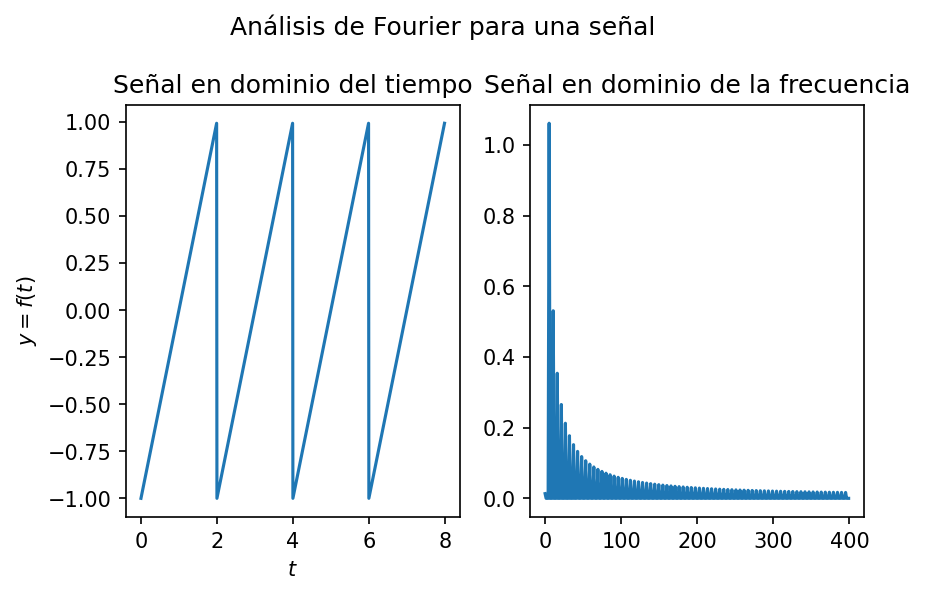

In [4]:
fig, ax = plt.subplots(1,2, dpi=150)
ax[0].plot(arreglo_X, arreglo_y)
ax[1].plot(xf,(2.0/N)*np.abs(yf[:N//2]))

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$y=f(t)$')

ax[0].set_title('Señal en dominio del tiempo')
ax[1].set_title('Señal en dominio de la frecuencia')

plt.suptitle('Análisis de Fourier para una señal')

fig.tight_layout()
plt.show()

## Implementaciones de FFT

En general, se recomienda usar la implementación de SciPy `scipy.fft.fft()` antes que la de numpy `np.fft.fft()`

## Aplicaciones
### Señal ruidosa

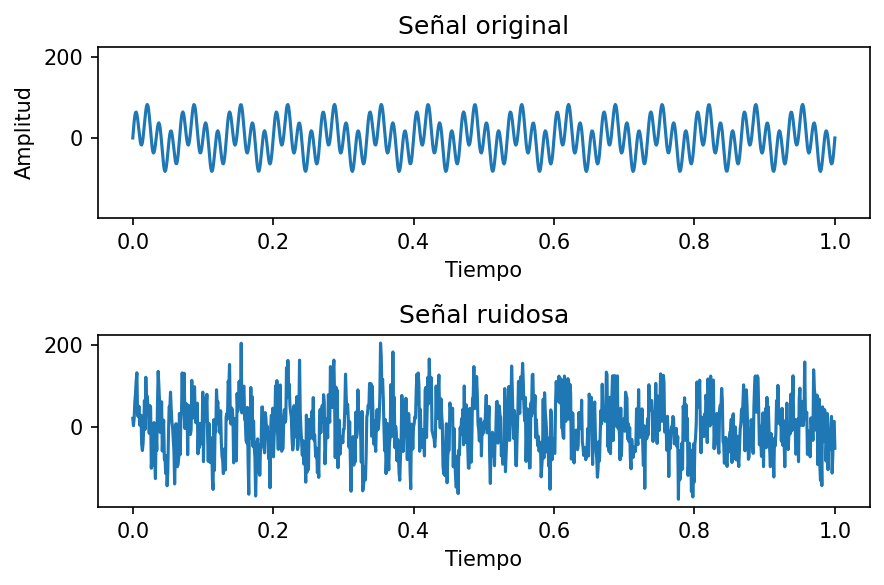

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, rfft

# Parámetros
tasa_muestreo = 1024
deltaT = 1

# Tamaño del arreglo de muestras
nPuntos = deltaT*tasa_muestreo

# arreglo de puntos para la coordenada temporal
# puntos_tiempo = np.arange(0, nPuntos, 1/tasa_muestreo)
puntos_tiempo = np.linspace(0, deltaT, nPuntos)
# print(len(puntos_tiempo))

frec_1 = 15
magnitud_1 = 35

# frec_1 = 5
# magnitud_1 = 5

frec_2 = 60
magnitud_2 = 50

# frec_2 = 13
# magnitud_2 = 2

# Señales
señal_1 = magnitud_1*np.sin(2*np.pi*frec_1*puntos_tiempo)
señal_2 = magnitud_2*np.sin(2*np.pi*frec_2*puntos_tiempo)

# Ruido para la señal
ruido = np.random.normal(0, 50, nPuntos)

señal_pura = señal_1 + señal_2
señal_ruidosa = señal_1 + señal_2 + ruido

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=150, sharey= True)
# ax1.plot(puntos_tiempo[0:50], señal_pura[0:50])
ax1.plot(puntos_tiempo, señal_pura)
ax1.set_title('Señal original')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Amplitud')

# ax2.plot(puntos_tiempo[1:50], señal_ruidosa[1:50])
ax2.plot(puntos_tiempo, señal_ruidosa)
ax2.set_title('Señal ruidosa')
ax2.set_xlabel('Tiempo')

fig.tight_layout()
plt.show()

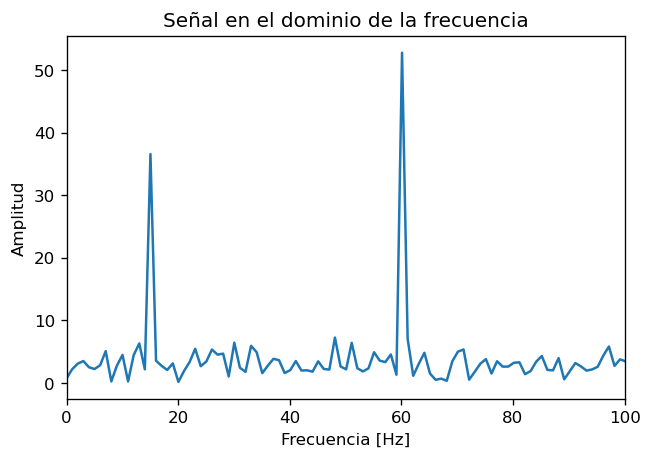

In [6]:
# Aplicación de la transformada

puntos_frecuencia = np.linspace (0.0, 512, int(nPuntos/2))

# Se aplica la transformada rapida a la señal
transformada_señal = rfft(señal_ruidosa)
# transformada_señal = fft(señal_ruidosa)
# print(transformada_señal)

# Pendiente
amplitudes = (2/nPuntos)*np.abs(transformada_señal[0:int(nPuntos/2)])

fig, ax = plt.subplots(dpi=120)
ax.plot(puntos_frecuencia, amplitudes)
ax.set_title('Señal en el dominio de la frecuencia')
ax.set_xlabel('Frecuencia [Hz]')
ax.set_ylabel('Amplitud')
ax.set_xlim([0,100])
# ax.set_xticks(np.arange(0,501,50))
plt.show()

### Ejemplo: Electrocardiograma

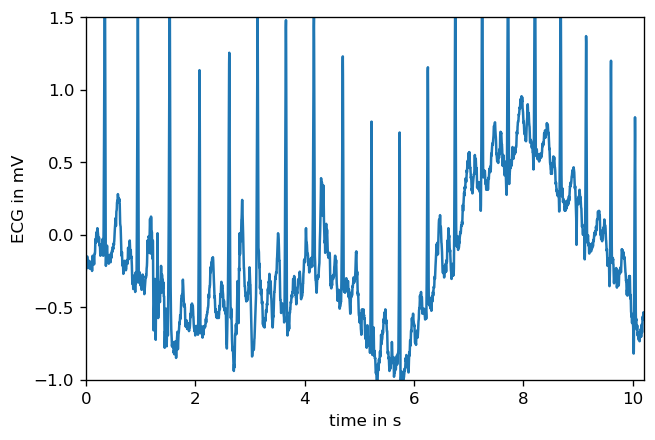

In [22]:
import scipy
# Tomado de https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html
fs = 360

# electrocardiograma = scipy.datasets.electrocardiogram()
electrocardiograma = scipy.misc.electrocardiogram()
time = np.arange(electrocardiograma.size) / fs

fig, ax = plt.subplots(dpi=120)
ax.plot(time, electrocardiograma)
# ax.set_title('Señal en el dominio de la frecuencia')
ax.set_xlabel('time in s')
ax.set_ylabel('ECG in mV')
# ax.set_xlim([0,100])
ax.set_xlim(0, 10.2)
ax.set_ylim(-1, 1.5)

plt.show()

### Ejemplo: Shazam

Programar un shazam con unas cuantas canciones predeterminadas

Algoritmo
- Cargue el audio
- Calcule la FFT
- Compare con la base de datos
- Identifique la canción

### Ejemplo: Eliminación del ruido en una imagen

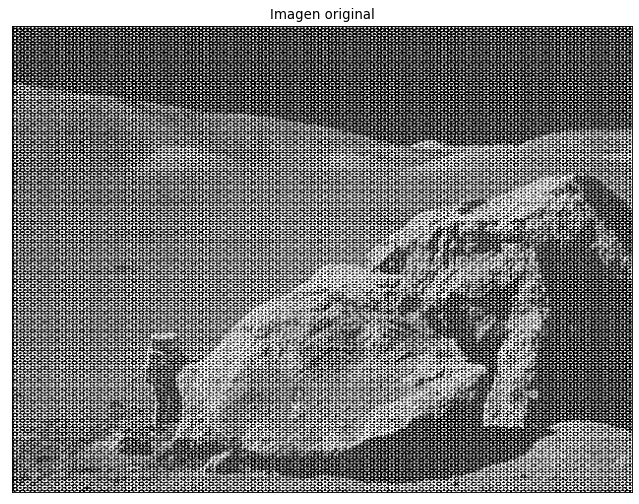

In [16]:
import matplotlib.pyplot as plt

img = plt.imread('moonlanding.png') # acá se debe insertar la ruta a la imagen

figura, orig = plt.subplots(1, 1, figsize = (10,10), dpi=80)
orig.imshow(img, plt.cm.gray)
orig.set_title('Imagen original')
orig.set_xticks([])
orig.set_yticks([])

plt.show()

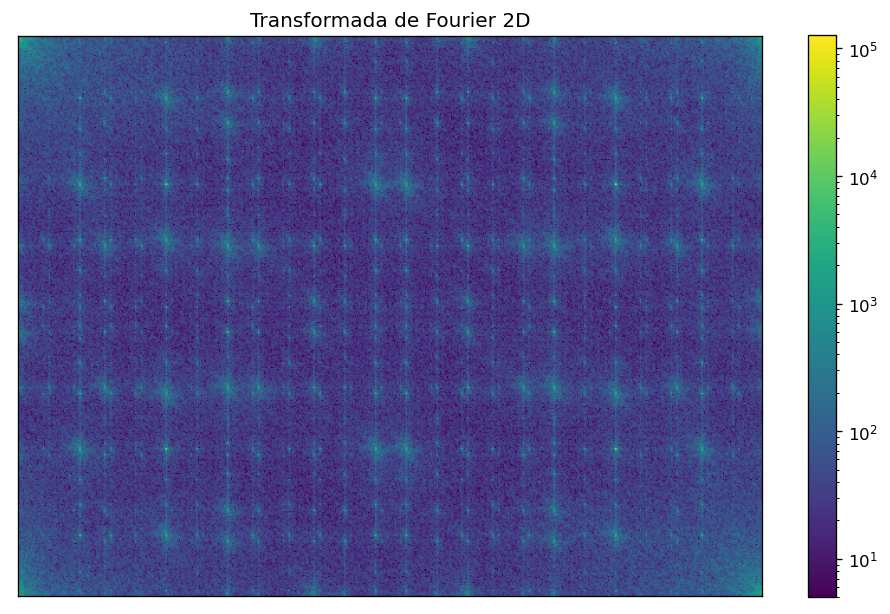

In [17]:
from scipy.fft import fft2
from matplotlib.colors import LogNorm

img_fft = fft2(img)

# Show the results

figura, ax = plt.subplots(1, 1, figsize = (10,10), dpi=120)
grafico = ax.imshow(np.abs(img_fft), norm=LogNorm(vmin=5))
color_bar = figura.colorbar(grafico, ax = ax, orientation = 'vertical', shrink = 0.62)
ax.set_title('Transformada de Fourier 2D')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

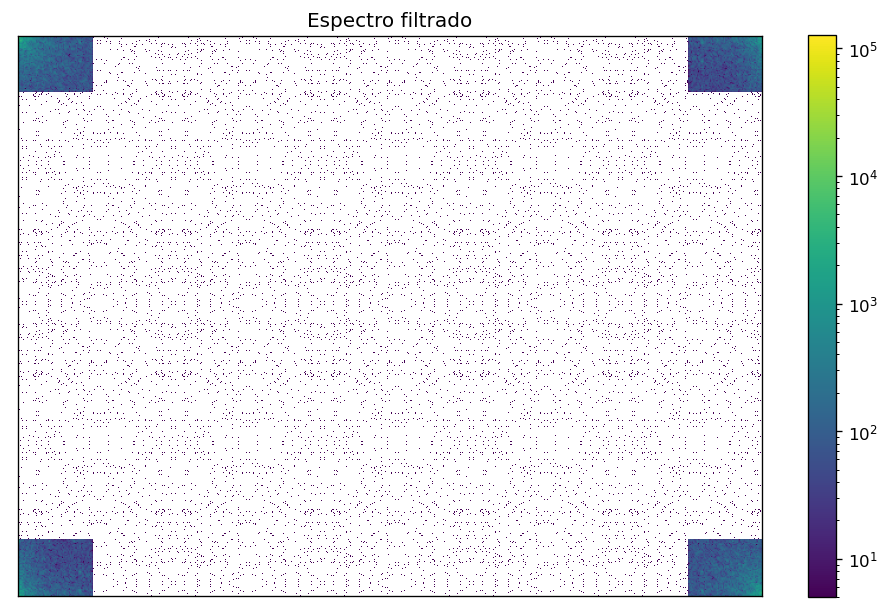

In [18]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
img_fft2 = img_fft.copy()

# Set r and c to be the number of rows and columns of the array.
nFilas, nColumnas = img_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
img_fft2[int(nFilas*keep_fraction):int(nFilas*(1-keep_fraction))] = 0

# Similarly with the columns:
img_fft2[:, int(nColumnas*keep_fraction):int(nColumnas*(1-keep_fraction))] = 0

figura, ax = plt.subplots(1, 1, figsize = (10,10), dpi=120)
grafico = ax.imshow(np.abs(img_fft2), norm=LogNorm(vmin=5))
color_bar = figura.colorbar(grafico, ax = ax, orientation = 'vertical', shrink = 0.62)
ax.set_title('Espectro filtrado')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

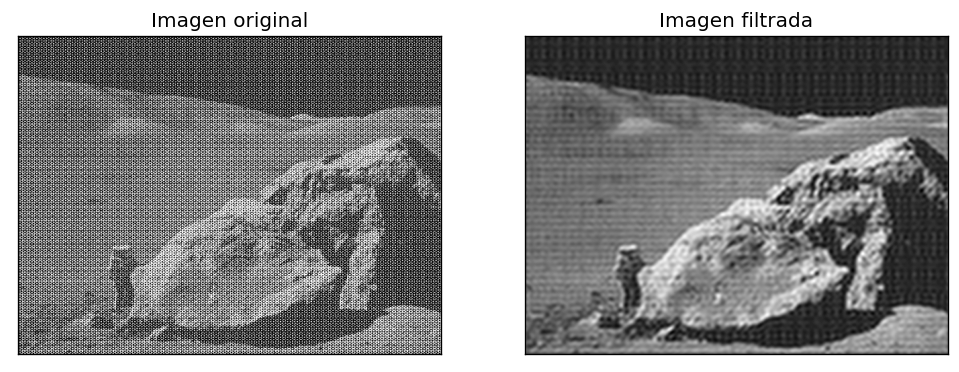

In [19]:
from scipy.fft import ifft2
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.

img_new = ifft2(img_fft2).real

figura, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10), dpi=120)

ax1.imshow(img, plt.cm.gray)
ax1.set_title('Imagen original')
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(img_new, plt.cm.gray)
ax2.set_title('Imagen filtrada')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

### Ejercicio: Procesamiento de una señal de audio

Investigue cómo procesar una señal de audio usando la trasformada rápida de Fourier. A continuación se le muestran los pasos que deben seguir se para completar el ejercicio:

In [ ]:
# Procesamiento de una señal de audio

def ProcesamientoSeñalAudio(audio):
    """
    audio: señal de audio de entrada en formato wav u otro
    
    Esta función sigue los siguientes pasos:
        1. Importar la señal de audio usando la función adecuada (investigar) de forma 
        que esta quede almacenada en un numpy array.
        2. Graficar la señal de entrada
        2. Se procesa la señal mediante la función scipy.fft.fft()
        3. Graficar el resultado de la transformada, es decir, la señal en el dominio de la frecuencia.
        4. Aplicarle un filtro a la señal para limpiar las frecuencias que aportan menos (ruido) (investigar)
        5. Aplicarle la transformada inversa a la señal filtrada
        6. Graficar la señal filtrada y comparar con la señal original
        7. OPCIONAL: transformar la señal filtrada en audio y averiguar cómo se puede reproducir 
        las señales en este cuaderno de jupyter. Comparar los audios.
    """
    
    return

### Ejercicio: Procesamiento de una imagen

Tomando como base el ejemplo mostrado anteriormente, procese una imagen (cualquiera) usando otros filtros y compare resultados.

In [ ]:
# Procesamiento de una imagen

def ProcesamientoImagen(imagen):
    """
    imagen: imagen de entrada en formato jpeg, png u otro
    
    Pseudocódigo:
        1. Importar la imagen
        2. Graficar la imagen original
        3. Calcular la transformada de Fourier en 2D de la imagen
        4. Graficar la imagen procesada en el dominio de la frecuencia
        5. Filtrar la imagen (investigar)
        6. Calcular la transformada inversa de la imagen filtrada
        7. Graficar la imagen filtrada y comparar con la imaen original
    """
    
    return

### Otros enlaces
- https://realpython.com/python-scipy-fft/\
- https://mural.maynoothuniversity.ie/4115/1/40.pdf
- https://www.gaussianwaves.com/2020/01/how-to-plot-audio-files-as-time-series-using-scipy-python/
- https://www.geeksforgeeks.org/how-to-extract-audio-wave-from-a-mixture-of-signal-using-scipy-python/
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
- https://www.geeksforgeeks.org/noise-removal-using-lowpass-digital-butterworth-filter-in-scipy-python/
- https://klyshko.github.io/teaching/2019-02-22-teaching

## Referencias

- Landau, R. H., Páez, J., & Bordeianu, C. C. (2011). _A Survey of Computational Physics: Introductory Computational Science_. Princeton: Princeton University Press.
- Newman, M. (2013). _Computational Physics_. Michigan: University of Michigan.
- https://scipy-lectures.org/intro/scipy.html#fast-fourier-transforms-scipy-fftpack
- https://docs.scipy.org/doc/scipy/reference/fft.html#module-scipy.fft